# Import Libraries

In [58]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [59]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [60]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [61]:
!pip install en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement en_core_web_sm (from versions: none)
ERROR: No matching distribution found for en_core_web_sm


In [62]:
#Install Packages
!pip install app-store-scraper
!pip install wordcloud

#Import Libraries
from app_store_scraper import AppStore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import json,os,uuid
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbkhn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [34]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

# Data Collection

In [ ]:
#Collect all the ChatGPT reviews from App Store
a_reviews = AppStore('us','linkedin','288429040')
a_reviews.review(sleep=1)

2023-10-29 12:24:45,362 [INFO] Base - Initialised: AppStore('us', 'linkedin', 288429040)
2023-10-29 12:24:45,362 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/linkedin/id288429040
2023-10-29 12:24:51,012 [INFO] Base - [id:288429040] Fetched 60 reviews (60 fetched in total)
2023-10-29 12:24:58,840 [INFO] Base - [id:288429040] Fetched 140 reviews (140 fetched in total)
2023-10-29 12:25:06,711 [INFO] Base - [id:288429040] Fetched 220 reviews (220 fetched in total)
2023-10-29 12:25:14,945 [INFO] Base - [id:288429040] Fetched 320 reviews (320 fetched in total)
2023-10-29 12:25:22,027 [INFO] Base - [id:288429040] Fetched 400 reviews (400 fetched in total)
2023-10-29 12:25:28,996 [INFO] Base - [id:288429040] Fetched 480 reviews (480 fetched in total)
2023-10-29 12:25:36,453 [INFO] Base - [id:288429040] Fetched 560 reviews (560 fetched in total)
2023-10-29 12:25:43,060 [INFO] Base - [id:288429040] Fetched 640 reviews (640 fetched in total)
2023-10-29 12:25:51,126 [IN

In [65]:
data = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,date,review,rating,isEdited,title,userName,developerResponse
0,2023-09-30 00:42:10,I hired Zalak to design my site based on two c...,5,False,Zalak Patel is a consummate PROFESSIONAL,Greg Ladner,NaN
1,2023-02-01 01:55:07,Update: LinkedIn heard my prayers and fixed my...,5,True,Love LinkedIn! But the app…,StrawberryBananaOrange,"{'id': 34549269, 'body': 'We appreciate you ta..."
2,2023-10-25 11:39:30,LinkedIn was okay until I became a creator. It...,5,False,Better as a creator,smithrof,NaN
3,2021-06-25 23:06:36,I spent about an hour carefully crafting a rep...,1,False,Need Auto-Saving for Drafts,Jinjarella,"{'id': 23826763, 'body': 'We appreciate you ta..."
4,2021-09-21 15:30:25,After using the application for quite a while ...,1,False,Unprofessional customer service and inaccurate...,ChanL996,NaN


In [66]:
data.shape

(1920, 7)

In [67]:
data.drop(['isEdited','userName'],axis=1,inplace=True) #Delete columns
data = data[['date','title','review','rating']] #Rearrange columns
data.head()

,date,title,review,rating
0,2023-09-30 00:42:10,Zalak Patel is a consummate PROFESSIONAL,I hired Zalak to design my site based on two c...,5
1,2023-02-01 01:55:07,Love LinkedIn! But the app…,Update: LinkedIn heard my prayers and fixed my...,5
2,2023-10-25 11:39:30,Better as a creator,LinkedIn was okay until I became a creator. It...,5
3,2021-06-25 23:06:36,Need Auto-Saving for Drafts,I spent about an hour carefully crafting a rep...,1
4,2021-09-21 15:30:25,Unprofessional customer service and inaccurate...,After using the application for quite a while ...,1


In [68]:
#Storing Data
data.to_csv('linkedin_reviews.csv',index=False)

In [69]:
data.to_excel('linkedin_reviews.xlsx', index=False)

# Exploratory Data Analysis

In [70]:
data = pd.read_csv('linkedin_reviews.csv')

In [71]:
data.shape

(1920, 4)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   title   1920 non-null   object
 2   review  1920 non-null   object
 3   rating  1920 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 60.1+ KB


In [73]:
data.describe()

,rating
count,1920.000000
mean,2.543229
std,1.487207
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [74]:
data.describe(include='object')

,date,title,review
count,1920,1920,1920
unique,1920,1847,1920
top,2023-09-30 00:42:10,Buggy,I hired Zalak to design my site based on two c...
freq,1,11,1


<h3> Analysis of Rating column </h3>

In [75]:
#Rating Distribution
data['rating'].value_counts().sort_index()

1    705
2    323
3    359
4    210
5    323
Name: rating, dtype: int64

In [76]:
data['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

1    36.72
2    16.82
3    18.70
4    10.94
5    16.82
Name: rating, dtype: float64

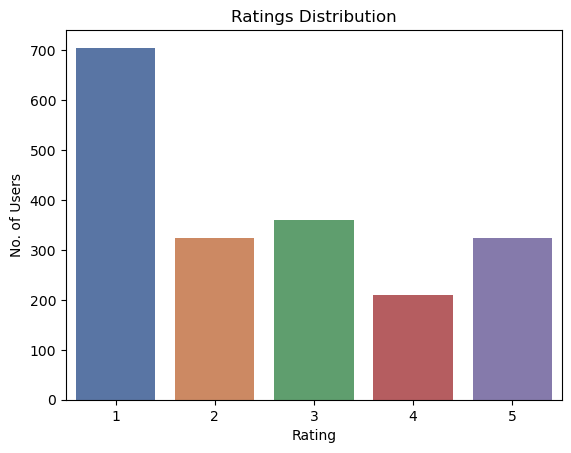

In [77]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.countplot(data=data, x='rating')

plt.xlabel('Rating')
plt.ylabel('No. of Users')
plt.title('Ratings Distribution')

plt.show()

# Data Preprocessing

In [78]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

date      0
title     0
review    0
rating    0
dtype: int64

In [79]:
#Combine Review Time and Review
data['complete_review'] = data['title'] +' .'+data['review']

In [80]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title']
data = data.drop(remove_cols,axis='columns')

In [81]:
data.head()

,rating,complete_review
0,5,Zalak Patel is a consummate PROFESSIONAL .I hi...
1,5,Love LinkedIn! But the app… .Update: LinkedIn ...
2,5,Better as a creator .LinkedIn was okay until I...
3,1,Need Auto-Saving for Drafts .I spent about an ...
4,1,Unprofessional customer service and inaccurate...


1. Convert all the reviews to lowercase

In [82]:
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['complete_review'].head()

0    zalak patel is a consummate professional .i hi...
1    love linkedin! but the app… .update: linkedin ...
2    better as a creator .linkedin was okay until i...
3    need auto-saving for drafts .i spent about an ...
4    unprofessional customer service and inaccurate...
Name: complete_review, dtype: object

2. Remove Punctuation

In [83]:
data['complete_review'] = data['complete_review'].str.replace('[^\w\s]','')

3. Remove Emojis

In [84]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['complete_review'] = data['complete_review'].apply(lambda x: remove_emoji(x))

4. Remove Stopwords

Stopwords are commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence and can be ignored without having a drastic effect on the meaning of the sentence.

In [85]:
stop = stopwords.words('english')
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

5. Apply Lemmatization

In [86]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
data['complete_review']= data['complete_review'].apply(space)

NameError: name 'nlp' is not defined

6. Remove certain words

  These are specific to app and won't show any sentiments

In [128]:
words_to_remove = ['linkedin','im','linked','get','page','mobile','one','good','even','number','ui','use','io']
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

7. Map ratings to positive, negative & neutral sentiment

0 will represent negative sentiment

1 will represent neutral sentiment

2 will represent positive sentiment


In [129]:
data['sentiment'] = data['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
data.head(5)

,rating,complete_review,sentiment
0,5,zalak patel consummate professional hired zala...,2
1,5,love update heard prayers fixed longer kicked ...,2
2,5,better creator okay became creator takes coura...,2
3,1,need autosaving drafts spent hour carefully cr...,0
4,1,unprofessional customer service inaccurate alg...,0


In [130]:
data['sentiment'].value_counts(normalize=True).mul(100).round(2)

0    53.54
2    27.76
1    18.70
Name: sentiment, dtype: float64

Data is Imbalanced as about 66% of sentiment is positive, 24% is negative and 9.5% is neutral.

# Reviews Analysis

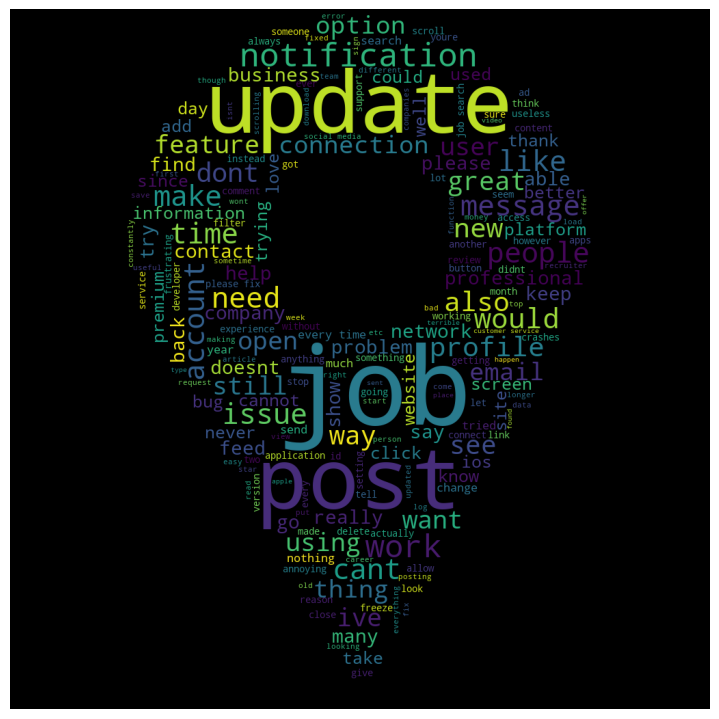

In [131]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in data.complete_review)
mask = np.array(Image.open("loc.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('review_sentiment.png')
plt.show()

In [132]:
#positive negative & neutral sentiment:
positive = data[data['sentiment'] == 2]
negative = data[data['sentiment'] == 0]
neutral = data[data['sentiment'] == 1]

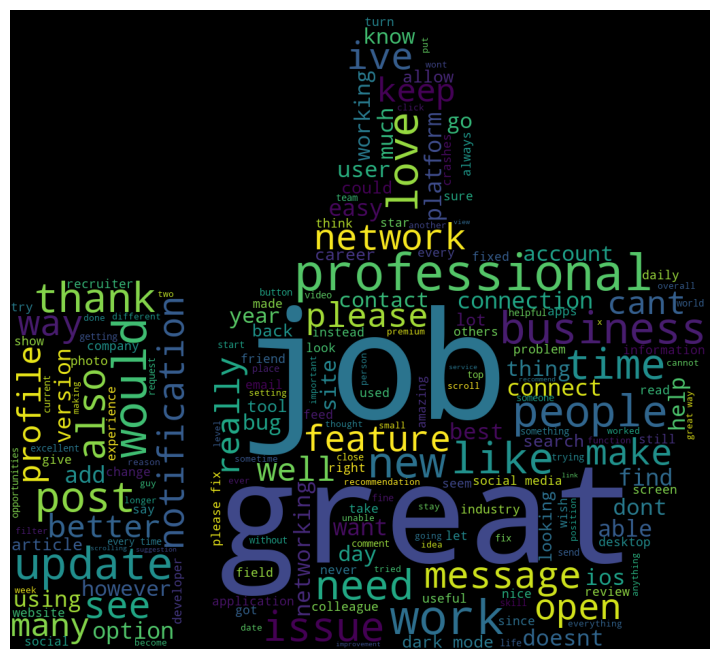

In [133]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
mask = np.array(Image.open("thumbs_up.png"))
wordcloud = WordCloud(width = 2200, height = 2300,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_sentiment.png')
plt.show()
wordcloud.to_file("posid.png")

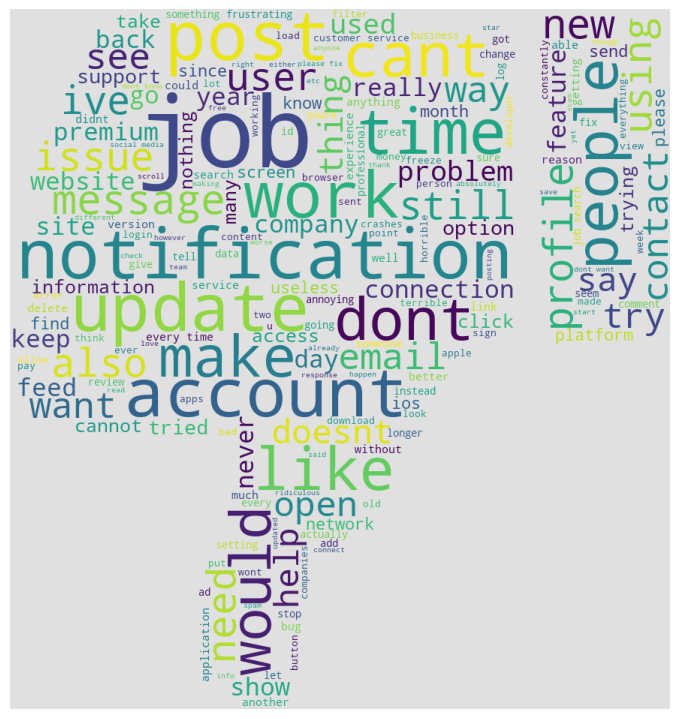

In [134]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
mask = np.array(Image.open("./thumbs_down.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='#E0E0E0',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_sentiment.png')
plt.show()

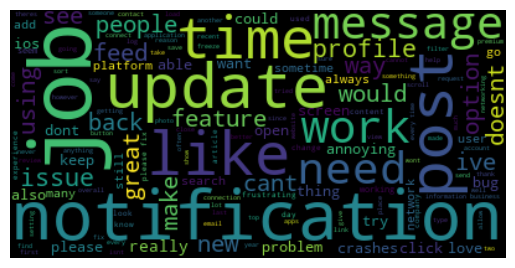

In [135]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis Model

<h3> Bag of Word Vectorization </h3>

In [136]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(data['complete_review'])
y = data['sentiment']

<h3> Handle Imbalanced Data </h3>

In [137]:
# Instantiate the SMOTE object
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

<h3> Train Test Split </h3>

In [138]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,
                                                  y_oversampled,
                                                  test_size=0.15,
                                                  random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2621, 6831)
(463, 6831)
(2621,)
(463,)


<h3> Multinomial Naive Bayes </h3>

In [139]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
y_pred = MNB.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.54      0.65       227
           1       0.57      0.62      0.60       143
           2       0.49      0.82      0.62        93

    accuracy                           0.62       463
   macro avg       0.62      0.66      0.62       463
weighted avg       0.67      0.62      0.62       463



<h3> Logistic Regression </h3>

In [140]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.67      0.66      0.67       157
           2       0.71      0.69      0.70       160

    accuracy                           0.71       463
   macro avg       0.71      0.71      0.71       463
weighted avg       0.71      0.71      0.71       463



<h3> Random Forest </h3>

In [141]:
# Initialize and train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       138
           1       0.70      0.63      0.66       173
           2       0.70      0.71      0.71       152

    accuracy                           0.70       463
   macro avg       0.70      0.71      0.70       463
weighted avg       0.70      0.70      0.70       463



<h3> XGBoost </h3>

In [103]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]

print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       176
           1       0.74      0.82      0.78       141
           2       0.83      0.88      0.85       146

    accuracy                           0.79       463
   macro avg       0.79      0.80      0.80       463
weighted avg       0.80      0.79      0.79       463



#Conclusion

The best-performing model was identified as XGBoost, which achieved an accuracy of 87% with the f1-score of 0.85 and above for all the labels(positive,negative & neutral). This model demonstrates the ability to accurately predict sentiment based on ChatGPT iOS reviews.

Overall, with the developed sentiment analysis model, we can effectively analyze and understand the sentiment expressed in ChatGPT reviews. This provides valuable insights for businesses, helping them make informed decisions, improve customer satisfaction, and enhance their products and services based on customer feedback.

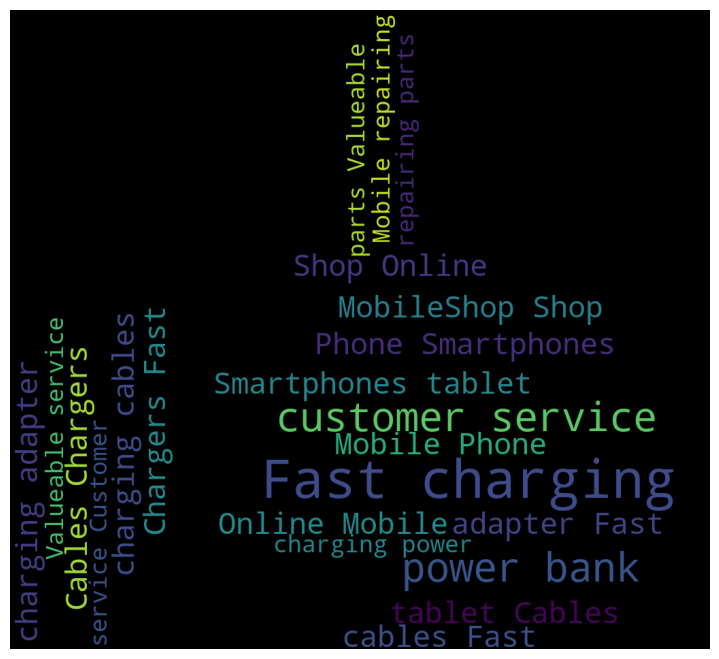

In [104]:
#Positive Setiment
text = "MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service"

mask = np.array(Image.open("thumbs_up.png"))
wordcloud = WordCloud(width = 1700, height = 3300,
                 background_color ='black',
                min_font_size = 30, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('pds.png')
plt.show()
wordcloud.to_file("spd.png")



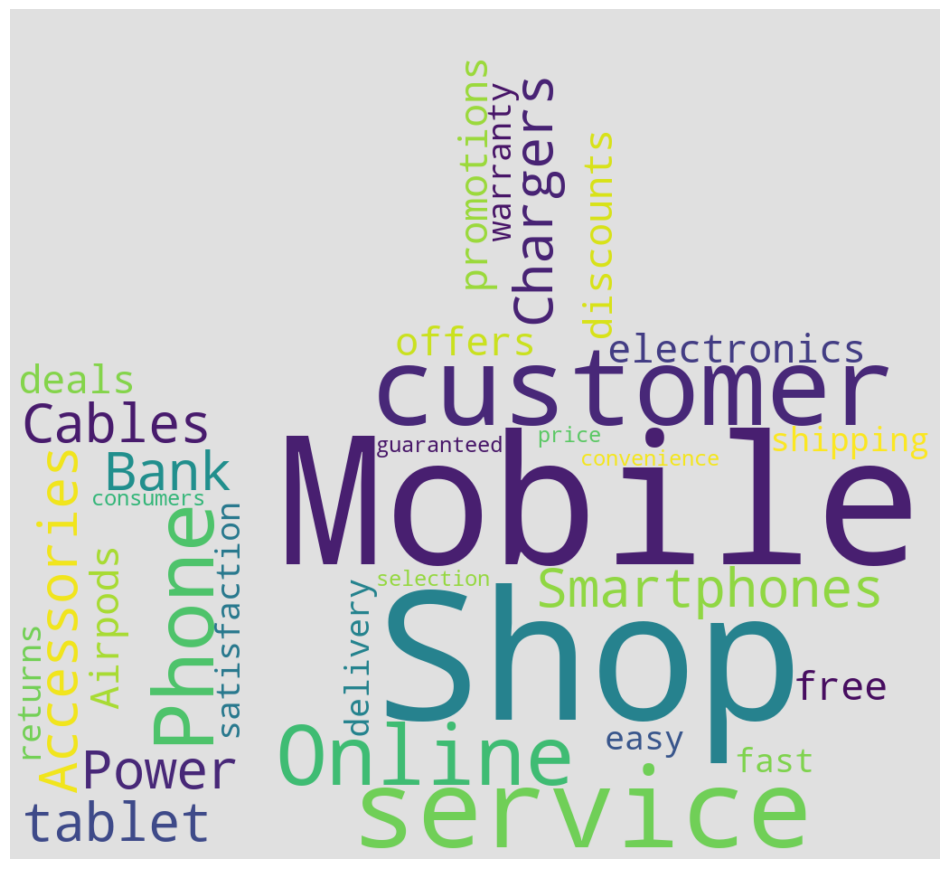

In [105]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

image_path = "loc.png"
image = Image.open(image_path)

wordcloud = WordCloud( background_color ='#E0E0E0',mask=mask)
text = "Mobile Shop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service"
wordcloud.generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the wordcloud image (optional)
wordcloud.to_file("wordcloud.png")